# I. Разминка numpy (1 балл)

## 1. Парсеки

Напишите функцию, которая принимает на вход:
- np.array - набор расстояний от Земли до звёзд (в световых годах)
- k - количество значений, которое нам нужно

Выведите топ-k самых удаленных звёзд от нас в порядке убывания разрастания, расстояния выведите в парсеках (1 парсек приблизительно равен 3.262 световым годам)

In [21]:
import numpy as np
def find_top_k_longest_distance_stars(distance, k):
  distance = np.sort(distance)
  distance = distance/3.262
  big = np.flip(distance[-k:])
  return big

In [24]:

print(find_top_k_longest_distance_stars(np.array([4.37, 8.6, 4.24, 4.37, 5.96, 7.8, 8.6, 7.9]), 4))

[2.63641937 2.63641937 2.4218271  2.39117106]


## 2. Оцениваем размер галактики

Напишите функцию, которая принимает на вход:
- np.array - набор масс звёзд в галактике
- k - количество максимальных по массе звёзд

Функция должна вывести два числа - первое - сумму масс первых k звёзд по массе, второе - сумму масс остальных звёзд.

In [22]:
def count_k_masses(mass, k):
  mass = np.sort(mass)
  return f"{np.sum(mass[-k:])}, {np.sum(mass[:-k])}"

In [23]:
# Просто пример, можно придумать свой
print(count_k_masses(np.array([150, 200, 300, 250, 400, 100, 200]), 2))

700, 900


# II. Помогаем Карелии

## 0. Загрузи датасет в этот блокнот (0.5 балла)

Открой гугл-диск курса, разархивируй zip-архив и собери нужные наборы данных из архива в единый датасет при помощи pandas.

In [3]:
import pandas as pd
import os
import zipfile

with zipfile.ZipFile('/content/Годовые отчеты об исполнении бюджета.zip', 'r') as zipped_budg:
  zipped_budg.extractall()

In [4]:
#!!! Перед запуском не забыть ссылку перепроверить
import pandas as pd
import os
import zipfile
from openpyxl import Workbook
import xlrd

def convert_xls_to_xlsx(file_path):
    """Все файлы имеют разный формат, некоторые (".XLS") пандас без помощи других библиотек прочитать не может.
      Именно поэтому для удобства привела все к одному формату """

    xlsx_path = file_path.rsplit(".", 1)[0] + ".xlsx"
    xls_book = xlrd.open_workbook(file_path)
    wb = Workbook()
    wb.remove(wb.active)
    for sheet in xls_book.sheets():
        ws = wb.create_sheet(title=sheet.name)
        for row_idx in range(sheet.nrows):
            ws.append(sheet.row_values(row_idx))
    wb.save(xlsx_path)
    return xlsx_path

def take_two_columns(df, year, sheet_name):
    """Тут логика в том, что в практически в каждом файле разное оформление. НО два столбца(как раз нужных нам),
       можно вытащить из любого файла выбором первой и предпоследней заполненной колонки. НО с 2016 по 2020 в листе расходы надо брать 2 и предпоследний"""
    df = df.dropna(axis=1, how='all')
    if sheet_name.lower() == "расход" and 2016 <= int(year) <= 2020:
        df = df.iloc[:, [1, -2]]
    else:
        df = df.iloc[:, [0, -2]]
    return df


def unify_excel_files(folder_path):
    files = os.listdir(folder_path)
    files = sorted([f for f in files], key=lambda x: int(x.rsplit('.', 1)[0]))
    all_data = []

    for file in files:
        file_path = os.path.join(folder_path, file)
        if file.lower().endswith(".xls"):
            file_path = convert_xls_to_xlsx(file_path)
        xls = pd.ExcelFile(file_path, engine="openpyxl")
        year = file_path.rsplit('.', 1)[0].rsplit('/', 1)[-1]

        income_sheet = next(s for s in xls.sheet_names if "доход" in s.lower())
        expense_sheet = next(s for s in xls.sheet_names if "расход" in s.lower())

        temp_data = []

        if income_sheet:
            df_income = pd.read_excel(xls, sheet_name=income_sheet)
            df_income = take_two_columns(df_income, year, "доход")
            df_income["Год"] = year
            df_income["Тип"] = "Доходы"
            temp_data.append(df_income)

        if expense_sheet:
            df_expense = pd.read_excel(xls, sheet_name=expense_sheet)
            df_expense = take_two_columns(df_expense, year, "расход")
            df_expense["Год"] = year
            df_expense["Тип"] = "Расходы"
            temp_data.append(df_expense)

        if temp_data:
            all_data.append(pd.concat(temp_data, ignore_index=True))
            all_data.append(pd.DataFrame([[], []]))

    final_df = pd.concat(all_data, ignore_index=True)
    return final_df

folder_path = "/content/â«ñ«óδÑ «ΓτÑΓδ «í ¿ß»«½¡Ñ¡¿¿ íεñªÑΓá"  #после разархивации появилась папка, руками вставила сюда путь на нее
df = unify_excel_files(folder_path)

df.to_excel("соединенный_бюджет2.xlsx", index=False, engine="openpyxl")
df.to_csv("соед_бюджет2.csv", index = False, encoding='utf-8-sig')

## 1. Предобработка датасета (2 балла)

- изучи датасет
- очисти данные в нём (есть ли в нём пропуски и выбросы? что ты можешь с ними сделать? сделай это.)

In [5]:
import pandas as pd

file_path = "/content/соединенный_бюджет2.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

new_order = [df.columns[2], df.columns[3]] + [col for i, col in enumerate(df.columns) if i not in [2, 3]]
df_reordered = df[new_order]


df_reordered.to_excel("переставленные_столбцы2.xlsx", index=False)

In [6]:
file_path = "/content/переставленные_столбцы2.xlsx"
df = pd.read_excel(file_path, sheet_name=0)
df = df.iloc[2:]
df = df.drop(df.index[552])

def shift_non_empty_left(df):
  return df.apply(lambda row: pd.Series(row.dropna().values), axis=1)

df_shifted = shift_non_empty_left(df)

output_path = "удаленные_столбцы_сдвинутые2.xlsx"
df_shifted.to_excel(output_path, index=False)


In [7]:
df = pd.read_excel('/content/удаленные_столбцы_сдвинутые2.xlsx', sheet_name=0)
mask = df.iloc[:, 2].astype(str).str.contains(r'итого|всего', case=False, na=False)
df_vsego_itogo = df[mask]
df_vsego_itogo.to_excel('таблица_с_итого.xlsx', index=False)


In [8]:
df = pd.read_excel('таблица_с_итого.xlsx', sheet_name=0)
df = df.drop([0, 1, 3])
df = df.drop(columns=2)
df.to_excel('таблица_с_итого.xlsx', index=False)
df.to_csv("таблица_с_итого.csv", index = False, encoding='utf-8-sig')

In [9]:
df_final = pd.read_excel('/content/удаленные_столбцы_сдвинутые2.xlsx', sheet_name = 0)
df_final = df_final.drop(df_final.index[4:6])
output_path = "финал_чистый.xlsx"
df_shifted.to_excel(output_path, index=False)
df_shifted.to_csv("финал_чистый.csv", index = False, encoding='utf-8-sig')

## 2. Найди параметры, которые влияют на бюджет (3.5 балла)

Поэкспериментируй с параметрами, найди 3 параметра, которые сильно связаны с значением бюджета Карелии за год (тут есть две цифры - расходы бюджета ИТОГО и доходы бюджета ИТОГО - искать параметры надо к обоим на основе **предыдущего года**) (при помощи коэффициента корреляции). Настоятельно рекомендуем поиграть с разными параметрами  - попробовать линейные комбинации, некоторые функции от параметров (log, возведение в степень, etc).

Оставь весь код экспериментов в этом блоке, но в конце опиши, какие параметры в итоге ты берёшь.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_summary = pd.read_csv("таблица_с_итого.csv")
df_details = pd.read_csv("финал_чистый.csv")
df_summary.columns = ['Year', 'Type', 'Amount']
df_details.columns = ['Year', 'Type', 'Category', 'Amount']
df_details = df_details.copy()

df_summary['Year'] = df_summary['Year'].astype(int)
df_summary['Amount'] = pd.to_numeric(df_summary['Amount'], errors='coerce').fillna(0)
df_details = df_details.dropna(subset=['Year']).copy()
df_details['Year'] = df_details['Year'].astype(int)
df_details['Amount'] = pd.to_numeric(df_details['Amount'], errors='coerce').fillna(0)
full_df = df_details.pivot_table(index=['Year'], columns=['Category'], values='Amount', aggfunc='sum').fillna(0)
full_df['ИТОГОВЫЕ ДОХОДЫ'] = df_summary[df_summary['Type'] == 'Доходы'].set_index('Year')['Amount']
full_df['ИТОГОВЫЕ РАСХОДЫ'] = df_summary[df_summary['Type'] == 'Расходы'].set_index('Year')['Amount']

def transform_dataframe(df, method):
    if method == 'log':
        return df.apply(np.log1p)
    elif method == 'sqrt':
        return df.apply(np.sqrt)
    elif method == 'square':
        return df.apply(np.square)
    elif method == 'norm':
        return (df - df.mean()) / df.std()
    return df

best_correlations = {}

for method in ['original', 'log', 'sqrt', 'square', 'norm']:
    transformed_df = transform_dataframe(full_df, method)
    numeric_cols = transformed_df.select_dtypes(include=[np.number]).columns
    corr_with_income = transformed_df[numeric_cols].corr()['ИТОГОВЫЕ ДОХОДЫ'].abs().sort_values(ascending=False)
    corr_with_expense = transformed_df[numeric_cols].corr()['ИТОГОВЫЕ РАСХОДЫ'].abs().sort_values(ascending=False)
    top_3_income = corr_with_income[1:4].index.tolist()
    top_3_expense = corr_with_expense[1:4].index.tolist()
    best_correlations[method] = {'income': top_3_income, 'expense': top_3_expense}

    print(method)
    print("Топ-3 параметра с наибольшей корреляцией с доходами бюджета:")
    print(*top_3_income, sep = "\n ")
    print()
    print("Топ-3 параметра с наибольшей корреляцией с расходами бюджета:")
    print(*top_3_expense, sep = "\n")
    print( )

final_top_3_income = best_correlations['log']['income']  # Выбрали логарифм как лучшую трансформацию
final_top_3_expense = best_correlations['log']['expense']

print("Топ-3 параметра для доходов:", *final_top_3_income, sep = "\n")
print()
print("Топ-3 параметра для расходов:", *final_top_3_expense, sep ="\n")




original
Топ-3 параметра с наибольшей корреляцией с доходами бюджета:
Другие вопросы в области культуры, кинематографии
 БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ
 БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ ДРУГИХ БЮДЖЕТОВ БЮДЖЕТНОЙ СИСТЕМЫ РОССИЙСКОЙ ФЕДЕРАЦИИ

Топ-3 параметра с наибольшей корреляцией с расходами бюджета:
Субсидии автономным учреждениям на иные цели
БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ
Обеспечение пожарной безопасности

log
Топ-3 параметра с наибольшей корреляцией с доходами бюджета:
БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ
 БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ ДРУГИХ БЮДЖЕТОВ БЮДЖЕТНОЙ СИСТЕМЫ РОССИЙСКОЙ ФЕДЕРАЦИИ
 Другие вопросы в области культуры, кинематографии

Топ-3 параметра с наибольшей корреляцией с расходами бюджета:
Обеспечение пожарной безопасности
Судебная система
БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ ДРУГИХ БЮДЖЕТОВ БЮДЖЕТНОЙ СИСТЕМЫ РОССИЙСКОЙ ФЕДЕРАЦИИ

sqrt
Топ-3 параметра с наибольшей корреляцией с доходами бюджета:
БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ
 Другие вопросы в области культуры, кинематографии
 БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ 

<font color="violet"> Тут надо написать параметры, которые ты выбрал </font>

# 3. Графики (1 балл)

Построй графики с выбранными параметрами и бюджетом Карелии. Что ты на них видишь?

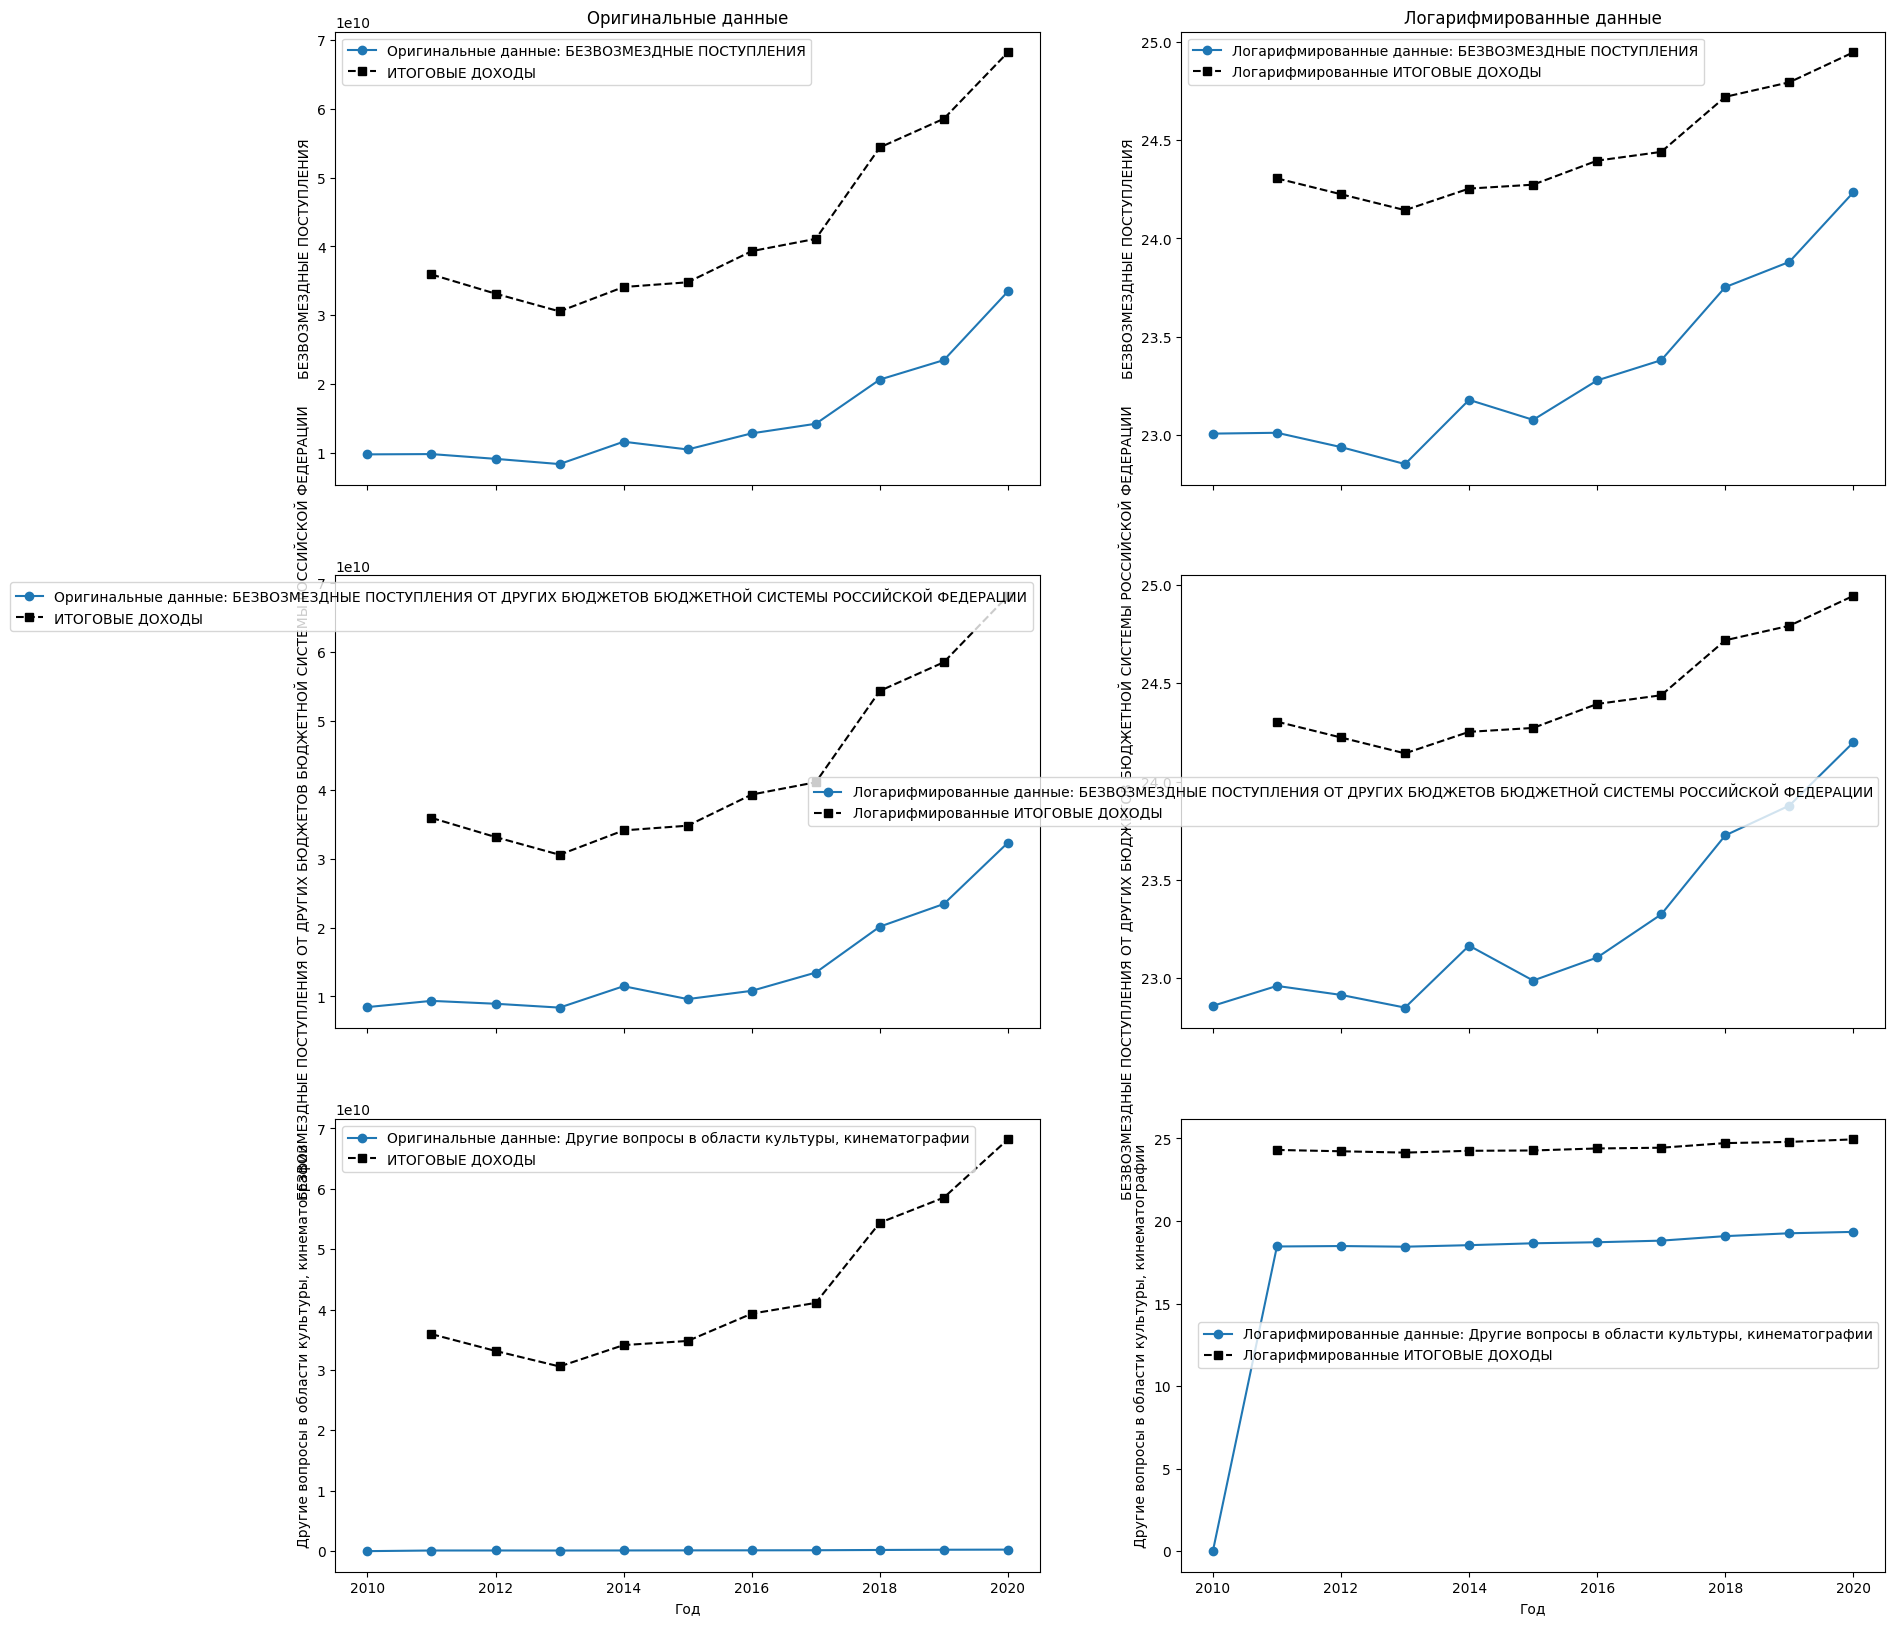

In [15]:
def transform_dataframe(df, method):
    if method == 'log':
        return df.apply(np.log1p)
    return df
log_df = transform_dataframe(full_df, 'log')
fig, axes = plt.subplots(len(final_top_3_income), 2, figsize=(20, 20), sharex=True)
for i, param in enumerate(final_top_3_income):

    axes[i, 0].plot(full_df.index, full_df[param], marker='o', linestyle='-', label=f'Оригинальные данные: {param}')
    axes[i, 0].plot(full_df.index, full_df['ИТОГОВЫЕ ДОХОДЫ'], marker='s', linestyle='--', color='black', label='ИТОГОВЫЕ ДОХОДЫ')
    axes[i, 0].set_ylabel(param)
    axes[i, 0].legend()

    axes[i, 1].plot(log_df.index, log_df[param], marker='o', linestyle='-', label=f'Логарифмированные данные: {param}')
    axes[i, 1].plot(log_df.index, log_df['ИТОГОВЫЕ ДОХОДЫ'], marker='s', linestyle='--', color='black', label='Логарифмированные ИТОГОВЫЕ ДОХОДЫ')
    axes[i, 1].set_ylabel(param)
    axes[i, 1].legend()

axes[0, 0].set_title("Оригинальные данные")
axes[0, 1].set_title("Логарифмированные данные")
axes[-1, 0].set_xlabel("Год")
axes[-1, 1].set_xlabel("Год")
plt.show()


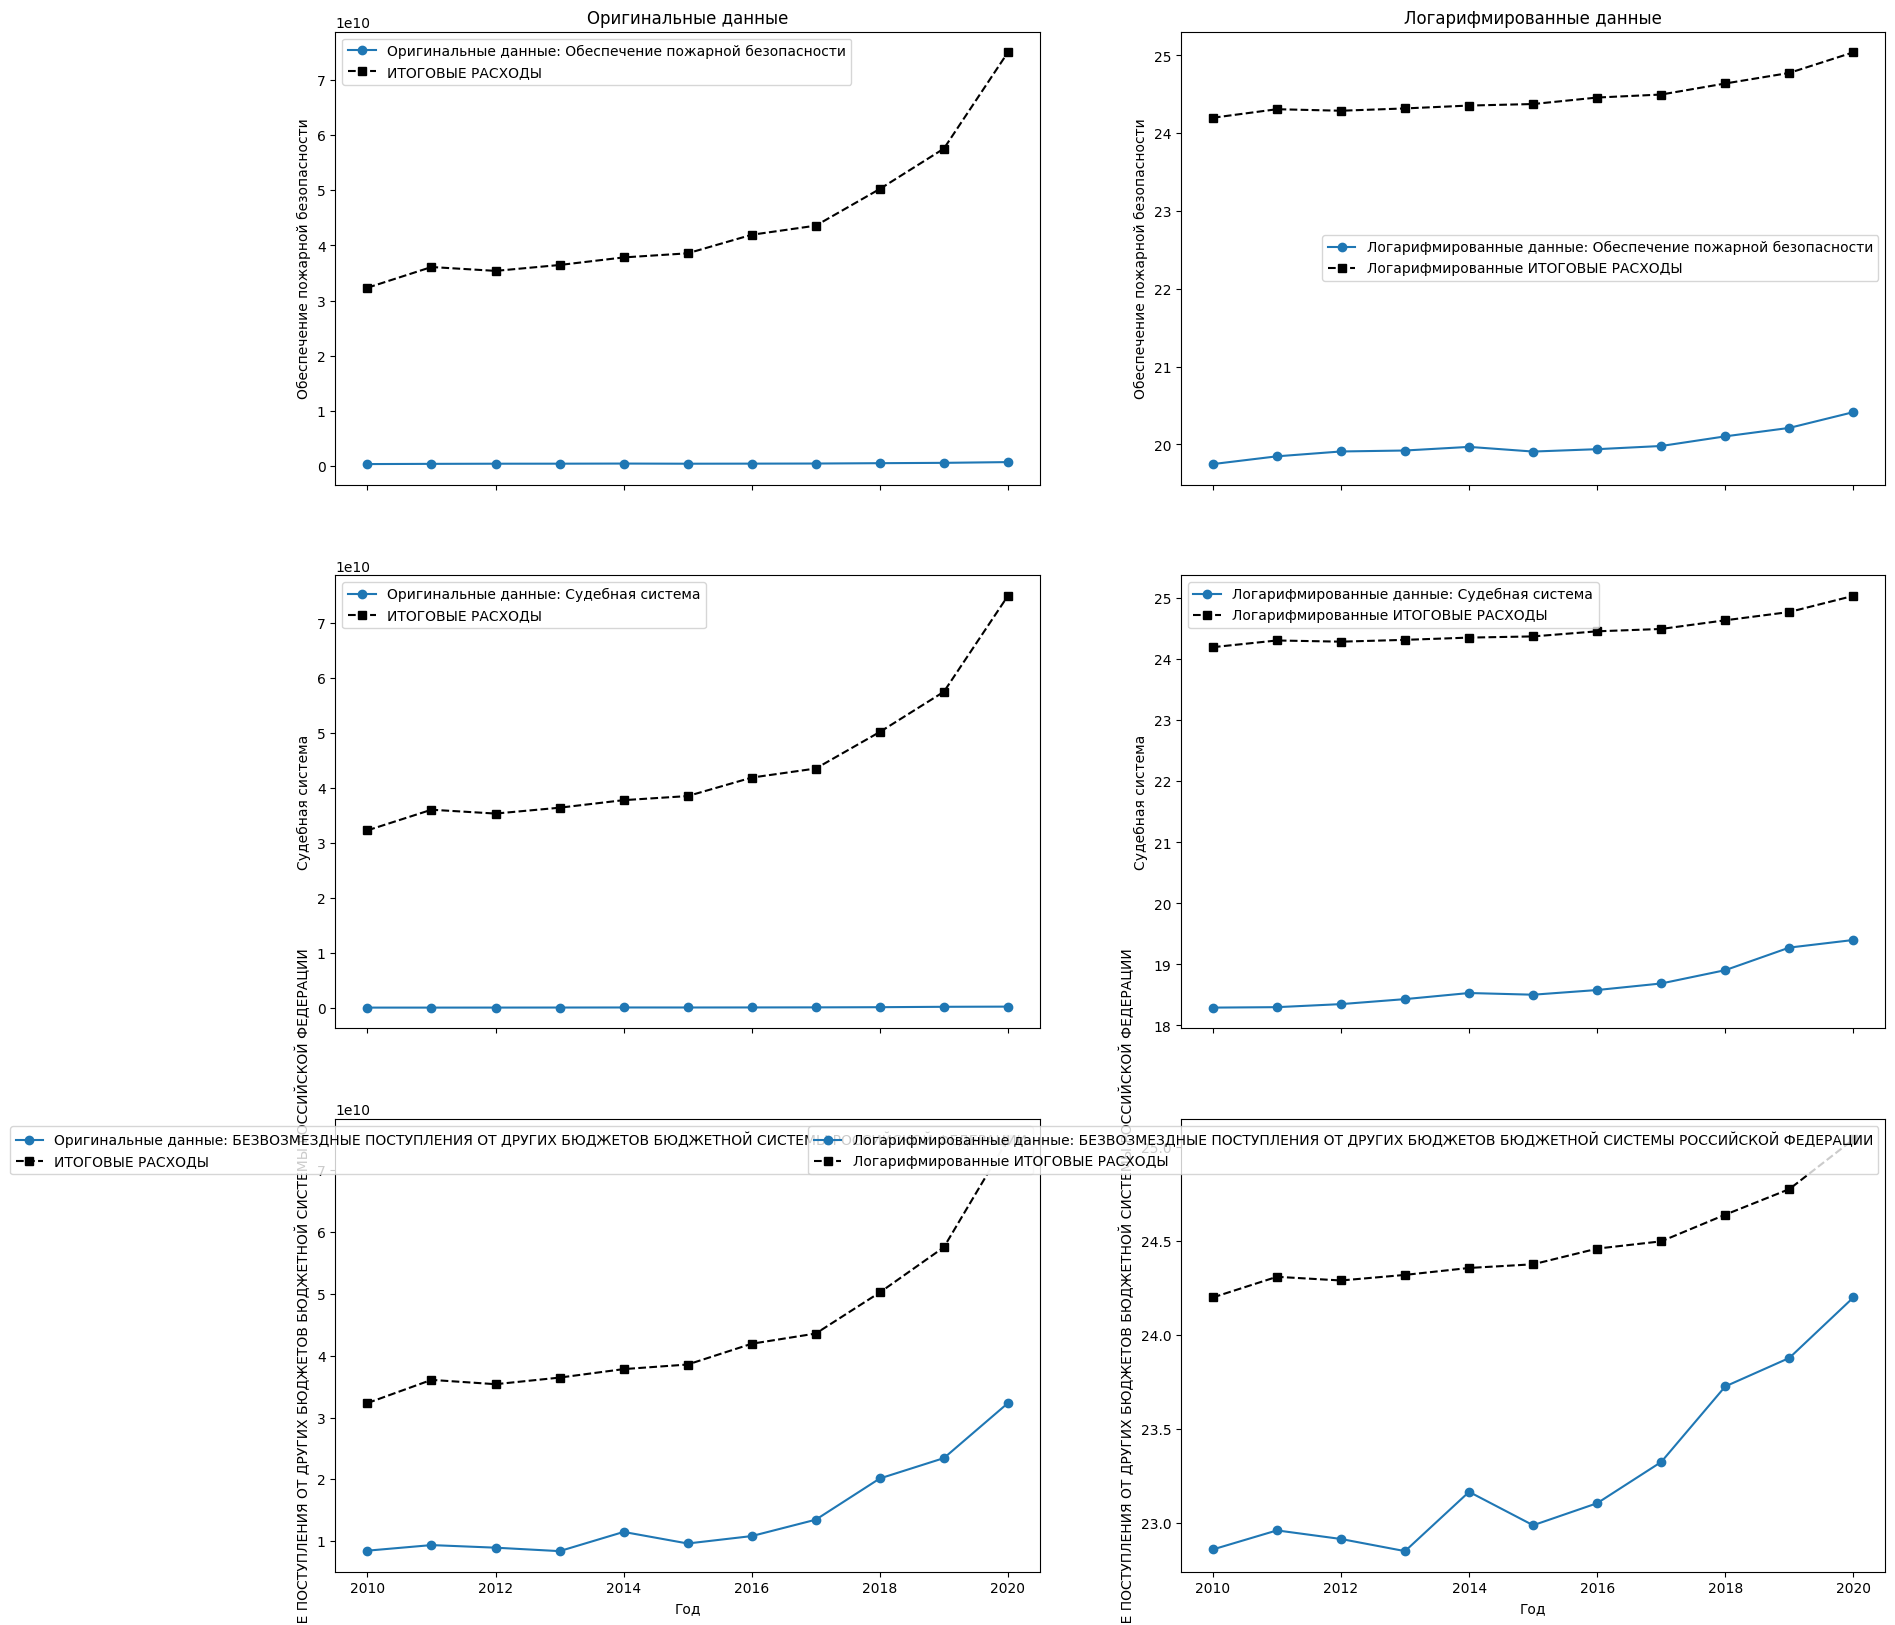

In [16]:

fig, axes = plt.subplots(len(final_top_3_expense), 2, figsize=(20, 20), sharex=True)

for i, param in enumerate(final_top_3_expense):
    axes[i, 0].plot(full_df.index, full_df[param], marker='o', linestyle='-', label=f'Оригинальные данные: {param}')
    axes[i, 0].plot(full_df.index, full_df['ИТОГОВЫЕ РАСХОДЫ'], marker='s', linestyle='--', color='black', label='ИТОГОВЫЕ РАСХОДЫ')
    axes[i, 0].set_ylabel(param)
    axes[i, 0].legend()

    axes[i, 1].plot(log_df.index, log_df[param], marker='o', linestyle='-', label=f'Логарифмированные данные: {param}')
    axes[i, 1].plot(log_df.index, log_df['ИТОГОВЫЕ РАСХОДЫ'], marker='s', linestyle='--', color='black', label='Логарифмированные ИТОГОВЫЕ РАСХОДЫ')
    axes[i, 1].set_ylabel(param)
    axes[i, 1].legend()

axes[0, 0].set_title("Оригинальные данные")
axes[0, 1].set_title("Логарифмированные данные")
axes[-1, 0].set_xlabel("Год")
axes[-1, 1].set_xlabel("Год")
plt.show()

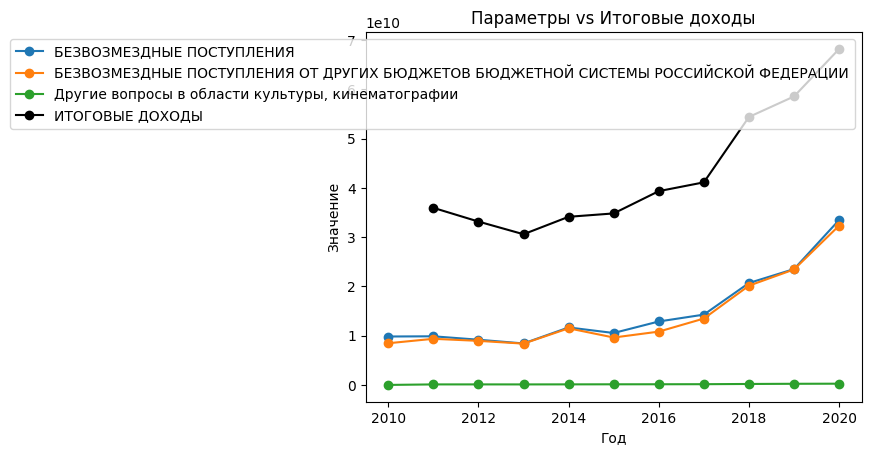

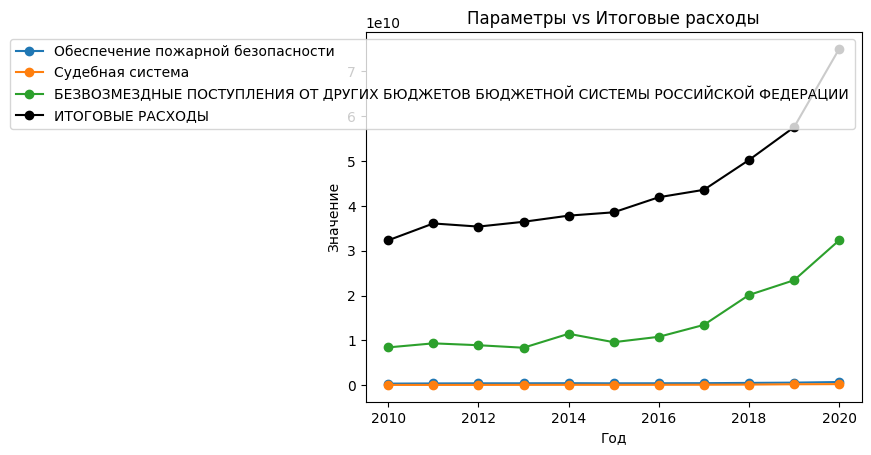

In [17]:
for param in final_top_3_income:
    plt.plot(full_df.index, full_df[param], marker='o', linestyle='-', label=param)
plt.plot(full_df.index, full_df['ИТОГОВЫЕ ДОХОДЫ'], marker='o', linestyle='-', color='black', label='ИТОГОВЫЕ ДОХОДЫ')
plt.title('Параметры vs Итоговые доходы')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.show()

for param in final_top_3_expense:
    plt.plot(full_df.index, full_df[param], marker='o', linestyle='-', label=param)
plt.plot(full_df.index, full_df['ИТОГОВЫЕ РАСХОДЫ'], marker='o', linestyle='-', color='black', label='ИТОГОВЫЕ РАСХОДЫ')
plt.title('Параметры vs Итоговые расходы')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.show()



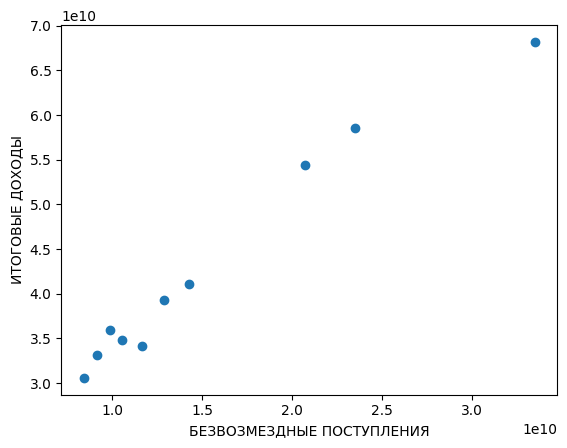

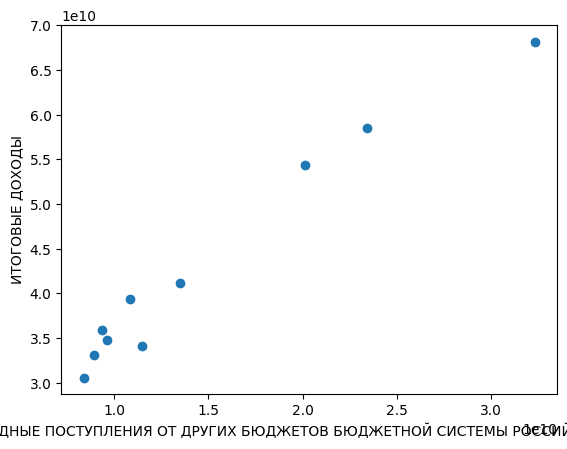

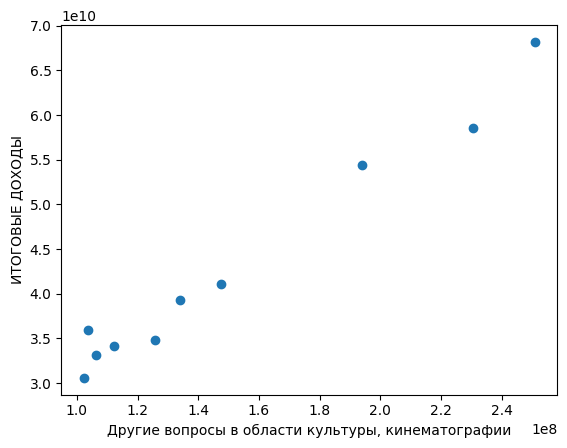

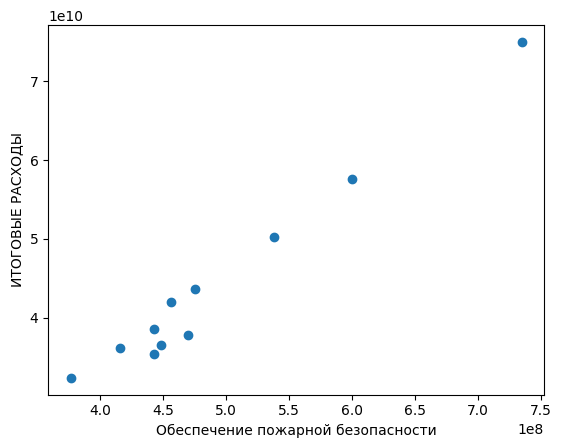

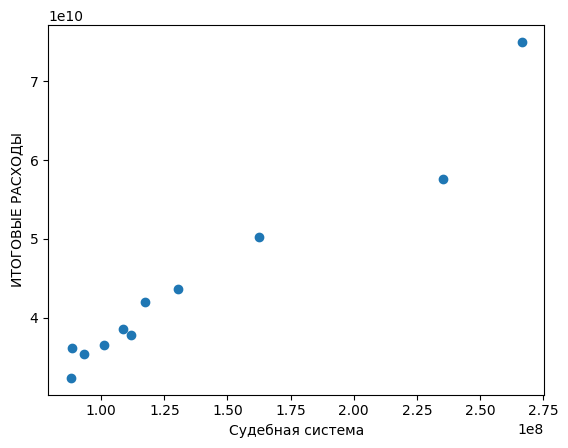

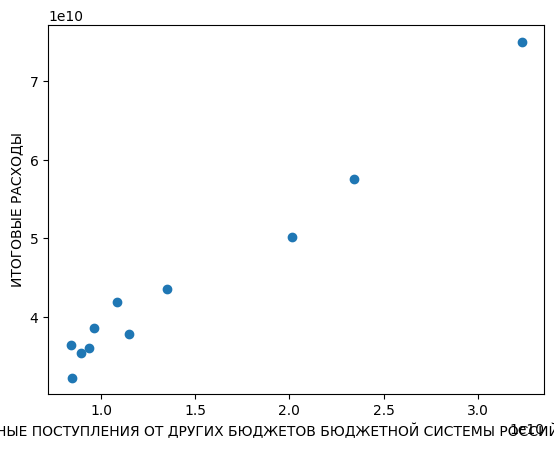

In [19]:
for param in final_top_3_income:
    plt.scatter(full_df[param], full_df['ИТОГОВЫЕ ДОХОДЫ'])
    plt.xlabel(param)
    plt.ylabel('ИТОГОВЫЕ ДОХОДЫ')
    plt.show()

for param in final_top_3_expense:
    plt.scatter(full_df[param], full_df['ИТОГОВЫЕ РАСХОДЫ'])
    plt.xlabel(param)
    plt.ylabel('ИТОГОВЫЕ РАСХОДЫ')
    plt.show()



## 4. Анализ параметров (2 балла)

На основе графиков и самих параметров, расскажи:

- Построй гипотезы, наблюдаешь ли ты казуацию или здесь просто совпадение?
- Предложи гипотезы, как проверить, нет ли ошибок в твоих выводах
- Проанализируй взаимосвязь с параметрами между собой. Являются ли они сильноскореллированными? Имеет ли смысл использовать их всех вместе или достаточно одного?

In [20]:
''' Гипотезы:

Графики показывают, что топ-3 параметра изменяются довольно синхронно с итоговыми доходами и расходами.
Поступления повышаются => растут доходы
Гипотеза: если причинно-следственная связь существует, то изменение в одном году параметров должно предсказуемо приводить к изменению бюджета в следующем году.
Как проверить? Ввести лаговые переменные и проверить, сохраняется ли связь при смещении данных на 1-2 года.

Возможна ситуация, когда оба параметра зависят от скрытого фактора, например, от экономической политики страны.
Как проверить? Включить в анализ дополнительные факторы (например, ВВП, инфляцию).

Возможно, что некоторые параметры оказывают сильное влияние только в определённые годы.
Чтобы проверить можно увеличить количество исследуемых

Корреляция между параметрами:'''
corr_m = full_df[top_3_income].corr()
print(corr_m)
"""БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ и БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ ДРУГИХ БЮДЖЕТОВ БЮДЖЕТНОЙ СИСТЕМЫ РОССИЙСКОЙ ФЕДЕРАЦИИ
 очень сильно скоррелированы, достаточно для анализа оставить 2 параметр. Идейно у них  одинаковый смысл(пополнение бюджета из вне)
"""

Category                                            Другие вопросы в области культуры, кинематографии  \
Category                                                                                                
Другие вопросы в области культуры, кинематографии                                            1.000000   
БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ                                                                    0.857558   
БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ ДРУГИХ БЮДЖЕТОВ БЮ...                                           0.871648   

Category                                            БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ  \
Category                                                                        
Другие вопросы в области культуры, кинематографии                    0.857558   
БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ                                            1.000000   
БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ ДРУГИХ БЮДЖЕТОВ БЮ...                   0.996786   

Category                                            БЕЗВОЗМЕЗДНЫЕ ПО

'БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ и БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ ДРУГИХ БЮДЖЕТОВ БЮДЖЕТНОЙ СИСТЕМЫ РОССИЙСКОЙ ФЕДЕРАЦИИ\n очень сильно скоррелированы, достаточно для анализа оставить 2 параметр. Идейно у них  одинаковый смысл(пополнение бюджета из вне)\n'

## 5. Линейная модель - BONUS TASK! - 2 балла.

Бонусное задание - попробуй построить линейную модель бюджета на основе выбранных параметров выше и (возможно) других параметров из датасета. Как думаешь, она состоятельная? Как бы ты проверял эту модель на корректность?

In [ ]:
# TODO (optional)